In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('Online_Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
data.shape

(541909, 8)

In [7]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
data.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(406829, 8)

In [11]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
data.duplicated().sum()

5225

In [13]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [14]:
df = pd.DataFrame({"InvoiceNo":[row for row in data["InvoiceNo"].values if "C"  not in str(row)]})
df.shape

(397924, 1)

In [15]:
df= df.drop_duplicates("InvoiceNo")

In [16]:
data = data.merge(df,on="InvoiceNo")

In [17]:
data.shape

(397924, 8)

<AxesSubplot:ylabel='InvoiceNo'>

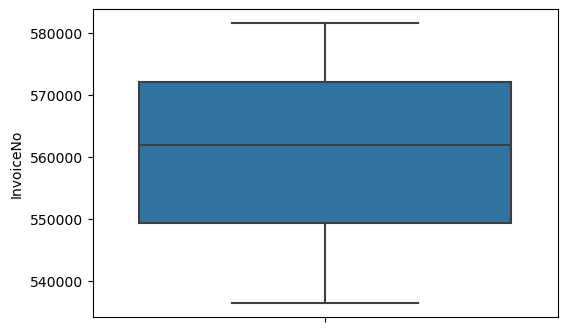

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(y="InvoiceNo", data=data)

<AxesSubplot:xlabel='Quantity'>

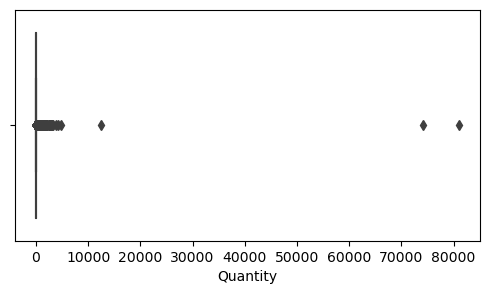

In [19]:
plt.figure(figsize=(6,3))
sns.boxplot(x="Quantity", data=data)

<AxesSubplot:xlabel='UnitPrice'>

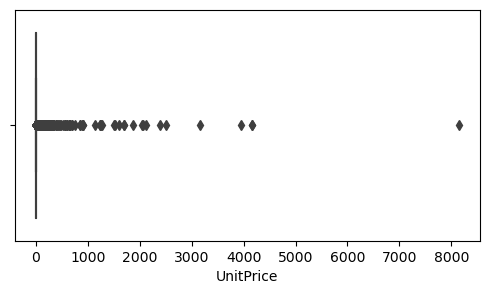

In [20]:
plt.figure(figsize=(6,3))
sns.boxplot(x="UnitPrice", data=data)

In [21]:
quartile1 = data["Quantity"].quantile(0.25)
quartile3 = data["UnitPrice"].quantile(0.75)
interquantile_range = quartile3 - quartile1
up_limit = quartile3 + 1.5 * interquantile_range
low_limit = quartile1 - 1.5 * interquantile_range

In [22]:
data.loc[(data['Quantity'] < low_limit),"Quantity" ] = low_limit
data.loc[(data['UnitPrice'] > up_limit),'UnitPrice' ] = up_limit

In [23]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,2.493529,15294.315171
std,180.420210,1.873373,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,6.375000,18287.000000


In [24]:
data = data[data["Quantity"] > 0]
data = data[data["UnitPrice"] > 0]

In [25]:
data.shape

(397884, 8)

In [26]:
data.nunique()

InvoiceNo      18532
StockCode       3665
Description     3877
Quantity         301
InvoiceDate    17282
UnitPrice        239
CustomerID      4338
Country           37
dtype: int64

In [27]:
df_uk = data[data["Country"] == "United Kingdom"]
df_uk.shape

(354321, 8)

In [28]:
def invoice_product_data(dataframe, id=False):
    if id:
        return dataframe.groupby(['InvoiceNo', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)

In [29]:
data_uk = invoice_product_data(df_uk, id=True)
data_uk.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
def check_id(dataframe, stockcode):
    product_name = dataframe[dataframe["StockCode"] == stockcode]["Description"].unique()[0]
    return stockcode, product_name

In [31]:
check_id(df_uk, 10125)

(10125, 'MINI FUNKY DESIGN TAPES')

In [32]:
check_id(data, 15034)

(15034, 'PAPER POCKET TRAVELING FAN ')

In [33]:
from mlxtend.frequent_patterns import apriori, association_rules
freq_items = apriori(data_uk, min_support=0.01, use_colnames=True)

C:\Users\gupta\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [34]:
freq_items.head()

,support,itemsets
0,0.018082,(15036)
1,0.012015,(17003)
2,0.010513,(20668)
3,0.010813,(20675)
4,0.014057,(20676)


In [35]:
rules = association_rules(freq_items, metric="support", min_threshold=0.01)
rules.sort_values("support", ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
366,(22386),(85099B),0.048780,0.086928,0.030398,0.623153,7.168625,0.026157,2.422924
367,(85099B),(22386),0.086928,0.048780,0.030398,0.349689,7.168625,0.026157,1.462715
34,(20725),(20727),0.067283,0.059834,0.029076,0.432143,7.222339,0.025050,1.655638
35,(20727),(20725),0.059834,0.067283,0.029076,0.485944,7.222339,0.025050,1.814425
446,(22697),(22699),0.036766,0.040731,0.028595,0.777778,19.095706,0.027098,4.316713


In [36]:
sorted_rules = rules.sort_values("lift", ascending=False)
sorted_rules.tail(7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
460,(22720),(85123A),0.060495,0.113601,0.011174,0.184707,1.625930,0.004302,1.087216
603,(47566),(85099B),0.077496,0.086928,0.010273,0.132558,1.524922,0.003536,1.052603
602,(85099B),(47566),0.086928,0.077496,0.010273,0.118176,1.524922,0.003536,1.046131
647,(85123A),(85099B),0.113601,0.086928,0.014538,0.127975,1.472195,0.004663,1.047071
646,(85099B),(85123A),0.086928,0.113601,0.014538,0.167243,1.472195,0.004663,1.064415
396,(85123A),(22423),0.113601,0.084705,0.013156,0.115812,1.367236,0.003534,1.035181
397,(22423),(85123A),0.084705,0.113601,0.013156,0.155319,1.367236,0.003534,1.049389


In [37]:
product_id = 21731
check_id(data, product_id)

(21731, 'RED TOADSTOOL LED NIGHT LIGHT')

## Recommendation

In [38]:
def data_filter(dataframe, country=False, Country=""):
    if country:
        dataframe = dataframe[dataframe["Country"] == Country]
    return dataframe

In [39]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [40]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [41]:
def data_prep(dataframe):
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe["StockCode"].str.contains("POST", na=False)]
    dataframe = dataframe[~dataframe["InvoiceNo"].astype(str).str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe = dataframe[dataframe["UnitPrice"] > 0]
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "UnitPrice")
    return dataframe

In [42]:
# Product Invoice Number
def invoice_product(dataframe, id=False):
    if id:
        return dataframe.groupby(['InvoiceNo', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0) 

In [43]:
# Product name with Stock Code:
def check_id(dataframe, stockcode):
    product_name = dataframe[dataframe["StockCode"] == stockcode]["Description"].unique()[0]
    return stockcode, product_name

In [44]:
# Association Rules and Apriori Algorithm 
def apriori_alg(dataframe, support_val=0.01):
    inv_pro_df = invoice_product(dataframe, id=True)
    frequent_itemsets = apriori(inv_pro_df, min_support=support_val, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=support_val)
    sorted_rules =  rules.sort_values("support", ascending=False) 
    return sorted_rules

def recommend_product(dataframe, product_id, support_val= 0.01, num_of_products=5):
    sorted_rules = apriori_alg(dataframe, support_val)
    recommendation_list = []  
    for idx, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[idx]["consequents"])[0])
                recommendation_list = list( dict.fromkeys(recommendation_list) )
    return(recommendation_list[0:num_of_products])

In [45]:
Dataset = data.copy(deep=False)
Dataset = data_prep(Dataset)
Dataset = data_filter(Dataset,country=True,Country="Germany")
Dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1098,536527,22809,SET OF 6 T-LIGHTS SANTA,6.0,2010-12-01 13:04:00,2.95,12662.0,Germany
1099,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6.0,2010-12-01 13:04:00,2.55,12662.0,Germany
1100,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12.0,2010-12-01 13:04:00,0.85,12662.0,Germany
1101,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12.0,2010-12-01 13:04:00,1.65,12662.0,Germany
1102,536527,22244,3 HOOK HANGER MAGIC GARDEN,12.0,2010-12-01 13:04:00,1.95,12662.0,Germany


In [46]:
def recommendation(dataframe,support_val=0.01, num_of_products= 5):
    product_id = input("Enter a product id:")
    
    if product_id in list(dataframe["StockCode"].astype("str").unique()):
        product_list = recommend_product(dataframe, int(product_id), support_val, num_of_products)
        if len(product_list) == 0:
            print("no product can be recommended")
        else:
            print("Related products with product id -" , product_id , "are:")
        
            for i in range(0, len(product_list[0:num_of_products])):
                print(check_id(dataframe, product_list[i]))
            
    else:
        print("Invalid Product Id")

In [47]:
recommendation(Dataset) #22728

Enter a product id:22728


C:\Users\gupta\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Related products with product id - 22728 are:
(22423, 'REGENCY CAKESTAND 3 TIER')
(22961, 'JAM MAKING SET PRINTED')
(22727, 'ALARM CLOCK BAKELIKE RED ')
(22554, 'PLASTERS IN TIN WOODLAND ANIMALS')
(22326, 'ROUND SNACK BOXES SET OF4 WOODLAND ')


In [48]:
recommendation(Dataset) #84945

Enter a product id:84945


C:\Users\gupta\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


no product can be recommended
